In [1]:
import pandas as pd, matplotlib.pyplot as plt

## A Priori Analysis

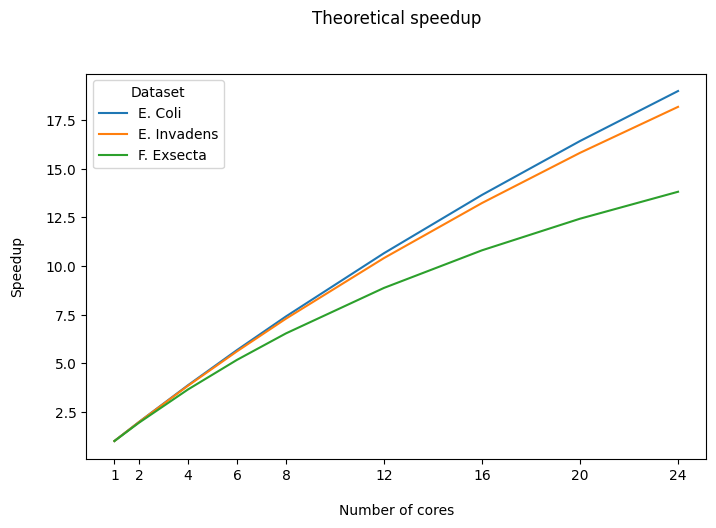

In [2]:
def estimate_speedups(S, P, Narray):
    speedups = []
    for N in Narray:
        speedup = 1 / (S + P/N)
        speedups.append(speedup)
    return speedups


Narray = [1,2,4,6,8,12,16,20,24]

speed1 = estimate_speedups(0.01145, 0.98855, Narray)
speed2 = estimate_speedups(0.01391, 0.98609, Narray)
speed3 = estimate_speedups(0.03204, 0.96796, Narray)

plt.figure(figsize=(8, 5))
plt.plot(Narray, speed1)
plt.plot(Narray, speed2)
plt.plot(Narray, speed3)
plt.title('Theoretical speedup\n\n')
plt.legend(title='Dataset', labels=['E. Coli ', 'E. Invadens', 'F. Exsecta'], loc='best')
plt.xticks(ticks=Narray)
plt.xlabel('\nNumber of cores')
plt.ylabel('Speedup\n')
plt.show()

# Scalability Analysis

In [3]:
def plot_graph(df, y, title, ylabel):
    fig, ax = plt.subplots(figsize=(8, 5))

    for key, grp in df.groupby(['dataset_size']):
        ax = grp.plot(ax=ax, kind='line', x='v_cpu', y=y, legend=True, linewidth=2)

    plt.title(title+'\n\n')
    plt.legend(title='Dataset', labels=['E. Coli ', 'E. Invadens', 'F. Exsecta'], loc='best')
    plt.xticks(ticks=df["v_cpu"])
    plt.xlabel('\nNumber of cores')
    plt.ylabel(ylabel+'\n')
    plt.show()

## Fat cluster

### Intra-regional

In [4]:
df_fat_intra = pd.read_csv('../src/parallel/GCP/tests/fat-cluster/intra/results_fat_intra.csv', delimiter=';', decimal=",", engine='python')

df_fat_intra

,dataset_size,v_cpu,time_read_preprocessing,time_search,time_total,speedup,efficiency
0,4699745,1,0.221,29.934,30.155,1.00,1.00
1,4699745,4,0.221,7.331,7.552,3.99,1.00
2,4699745,8,0.284,3.915,4.199,7.18,0.90
3,4699745,12,0.280,2.586,2.866,10.52,0.88
4,4699745,16,0.285,1.995,2.280,13.23,0.83
5,4699745,20,0.316,1.568,1.883,16.01,0.80
6,4699745,24,0.282,1.338,1.620,18.61,0.78
7,41522539,1,1.942,181.256,183.198,1.00,1.00
8,41522539,4,1.936,46.065,48.001,3.82,0.96
9,41522539,8,2.437,24.897,27.334,6.70,0.84


#### Strong scalability

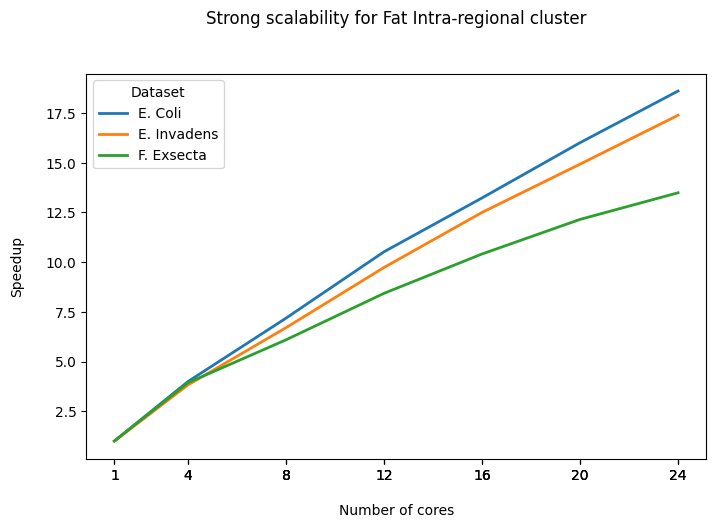

In [5]:
plot_graph(df_fat_intra, 'speedup', 'Strong scalability for Fat Intra-regional cluster', 'Speedup')

#### Weak scalability

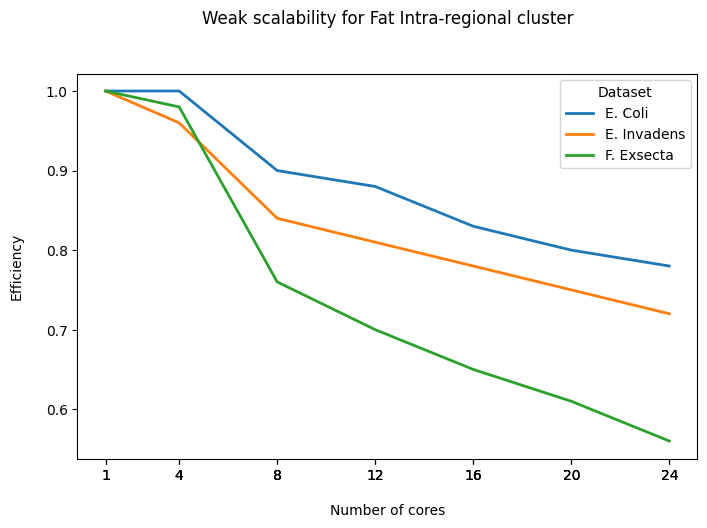

In [6]:
plot_graph(df_fat_intra, 'efficiency', 'Weak scalability for Fat Intra-regional cluster', 'Efficiency')

### Infra-regional

In [7]:
df_fat_infra = pd.read_csv('../src/parallel/GCP/tests/fat-cluster/infra/results_fat_infra.csv', delimiter=';', decimal=",", engine='python')

df_fat_infra

,dataset_size,v_cpu,time_read_preprocessing,time_search,time_total,speedup,efficiency
0,4699745,1,0.222,30.413,30.636,1.00,1.00
1,4699745,4,0.233,7.641,7.874,3.89,0.97
2,4699745,8,0.305,4.321,4.626,6.62,0.83
3,4699745,12,0.293,6.603,6.896,4.44,0.37
4,4699745,16,0.300,8.237,8.537,3.59,0.22
5,4699745,20,0.292,11.541,11.833,2.59,0.13
6,4699745,24,0.308,13.869,14.177,2.16,0.09
7,41522539,1,1.952,183.610,185.563,1.00,1.00
8,41522539,4,1.959,46.787,48.746,3.81,0.95
9,41522539,8,2.459,25.666,28.125,6.60,0.83


#### Strong scalability

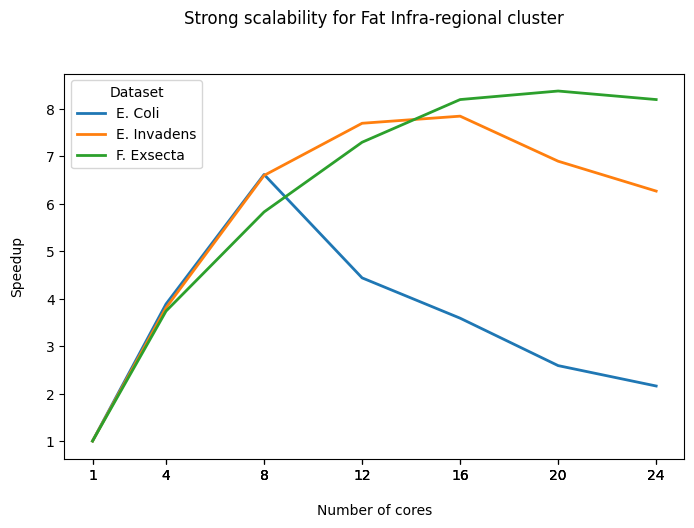

In [8]:
plot_graph(df_fat_infra, 'speedup', 'Strong scalability for Fat Infra-regional cluster', 'Speedup')

#### Weak scalability

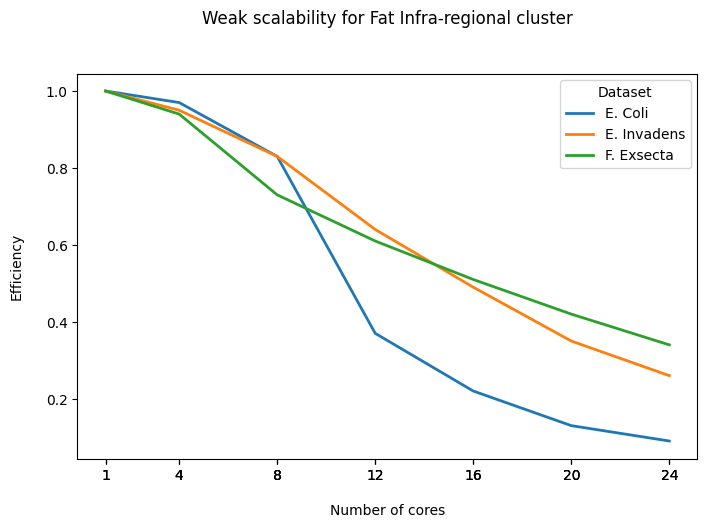

In [9]:
plot_graph(df_fat_infra, 'efficiency', 'Weak scalability for Fat Infra-regional cluster', 'Efficiency')

## Light cluster

### Intra-regional

In [10]:
df_light_intra = pd.read_csv('../src/parallel/GCP/tests/light-cluster/intra/results_light_intra.csv', delimiter=';', decimal=",", engine='python')

df_light_intra

,dataset_size,v_cpu,time_read_preprocessing,time_search,time_total,speedup,efficiency
0,4699745,1,0.222,30.044,30.266,1.00,1.00
1,4699745,2,0.281,15.923,16.203,1.87,0.94
2,4699745,4,0.284,7.909,8.194,3.69,0.92
3,4699745,6,0.284,5.282,5.566,5.44,0.91
4,4699745,8,0.290,3.977,4.267,7.09,0.89
5,4699745,10,0.284,3.171,3.455,8.76,0.88
6,4699745,12,0.287,2.665,2.952,10.25,0.85
7,41522539,1,1.961,186.506,188.467,1.00,1.00
8,41522539,2,2.444,104.723,107.168,1.76,0.88
9,41522539,4,2.513,51.158,53.671,3.51,0.88


#### Strong scalability

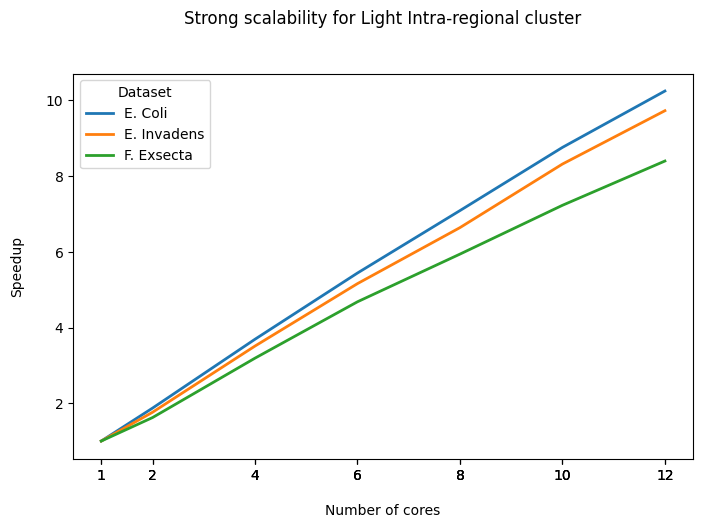

In [11]:
plot_graph(df_light_intra, 'speedup', 'Strong scalability for Light Intra-regional cluster', 'Speedup')

#### Weak scalability

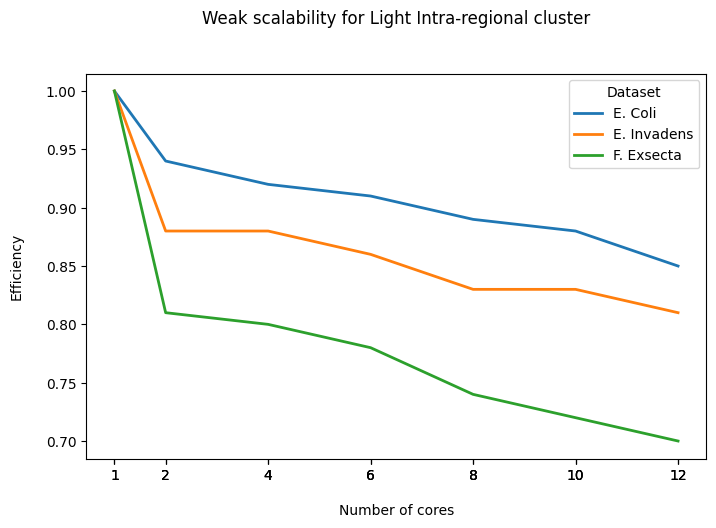

In [12]:
plot_graph(df_light_intra, 'efficiency', 'Weak scalability for Light Intra-regional cluster', 'Efficiency')

### Infra-regional

In [13]:
df_light_infra = pd.read_csv('../src/parallel/GCP/tests/light-cluster/infra/results_light_infra.csv', delimiter=';', decimal=",", engine='python')

df_light_infra

,dataset_size,v_cpu,time_read_preprocessing,time_search,time_total,speedup,efficiency
0,4699745,1,0.223,30.166,30.389,1.00,1.00
1,4699745,2,0.285,16.057,16.343,1.86,0.93
2,4699745,4,0.281,8.669,8.951,3.40,0.85
3,4699745,6,0.290,8.042,8.332,3.65,0.61
4,4699745,8,0.288,8.237,8.526,3.56,0.45
5,4699745,10,0.283,10.691,10.975,2.77,0.28
6,4699745,12,0.282,13.604,13.886,2.19,0.18
7,41522539,1,2.113,187.293,189.406,1.00,1.00
8,41522539,2,2.473,104.667,107.140,1.77,0.89
9,41522539,4,2.464,52.328,54.792,3.46,0.87


#### Strong scalability

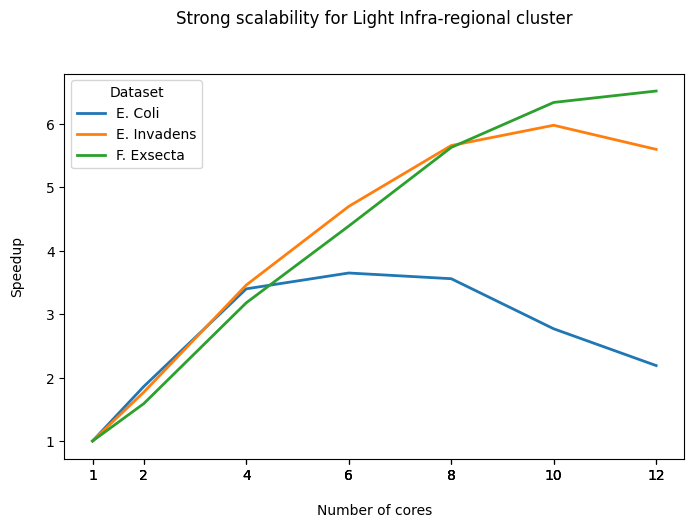

In [14]:
plot_graph(df_light_infra, 'speedup', 'Strong scalability for Light Infra-regional cluster', 'Speedup')

#### Weak scalability

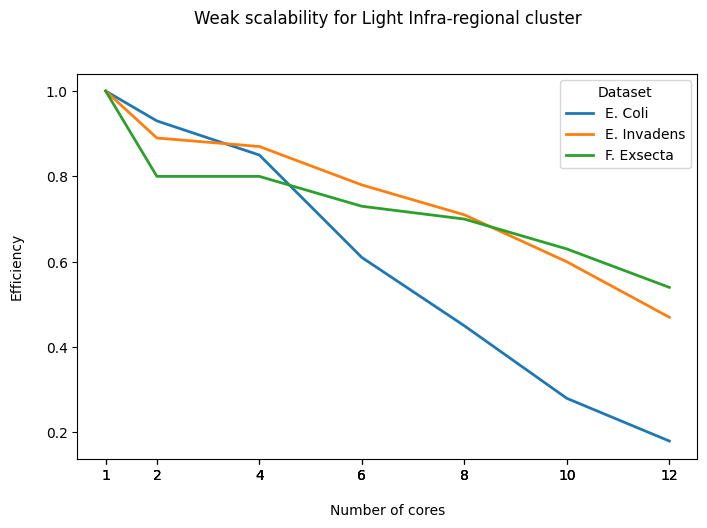

In [15]:
plot_graph(df_light_infra, 'efficiency', 'Weak scalability for Light Infra-regional cluster', 'Efficiency')

In [54]:
#import sys
#!{sys.executable} -m pip install scipy
from scipy.stats import ks_2samp

ks_2samp(df_fat_intra['speedup'], df_light_intra['speedup'])

KstestResult(statistic=0.47619047619047616, pvalue=0.015905243702949885, statistic_location=10.25, statistic_sign=-1)